# Voter System Proposal Simulation

Joshua Sanz, Robert Wang, Victor Han

In [1]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats
import time


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from VoterModel import VoterModel
from graphs import *
from vm_change import *

In [3]:
N = 10
er = erdos_renyi(N, 0.5)
#er = complete_graph(N)
#er = cycle(N)
#er = torus_2d(5,2)

C:\Users\rwang\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


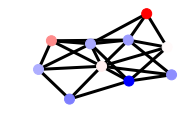

In [4]:
options = {
    'node_color': np.random.rand(N),
    'node_size': 100,
    'width': 3,
    'cmap': 'bwr'
}
plt.subplot(221)
nx.draw(er, **options)

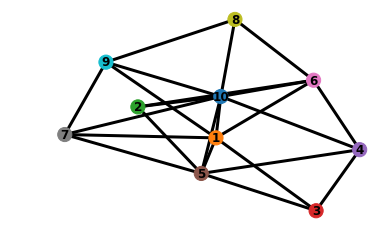

In [5]:
# vm = VoterModel(graph = er, voting='simple', visualization='shell')
# vm = VoterModel(graph = er, voting='probability', visualization='shell')
vm = VoterModel(graph=er, voting='weighted_prob', visualization='spring',
                handicap_b1=1.0, handicap_b2=0.0)
vm.initialize('all_unique')
vm.draw()

<IPython.core.display.Javascript object>


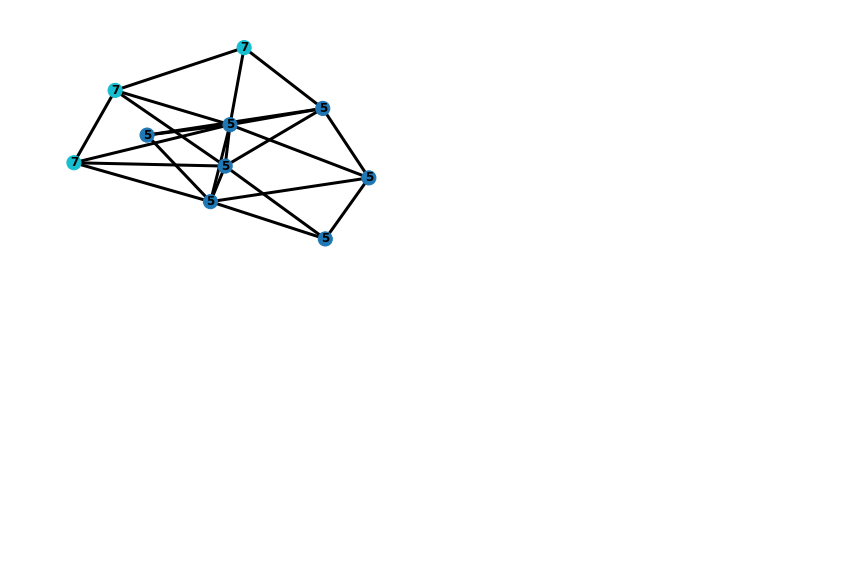

In [6]:
# Here we demonstrate an animation. The resulting animation is also saved to a gif.
# The below magic command is needed for the animation.
%matplotlib notebook
vm.initialize('all_unique')
beliefs = list(set([v.belief[0] for v in vm._voters]))
flux_arr = []
belief_arr = []
time_arr = []
vm.draw()
plt.show()

for i in range(10):
    cb, ub, ta = vm.update()
    plt.pause(0.1)
    flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)
    vm.draw()
    
vm.save_gif(fps=1, fname='sim.gif')
%matplotlib inline

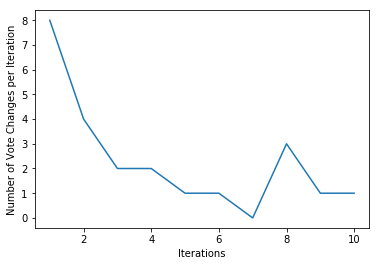

In [7]:
# Plot the number of belief changes per iteration
if vm.clock == 'discrete':
    plt.figure()
    plot_flux(flux_arr)

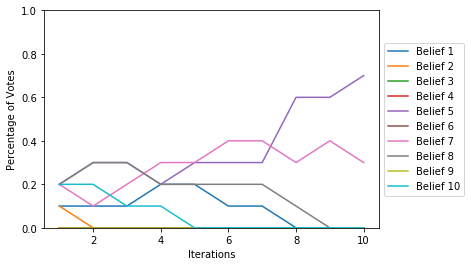

In [8]:
# Plot the distribution of beliefs per iteration
if vm.clock == 'discrete':
    plt.figure()
    plot_comparisons(belief_arr, beliefs)

In [9]:
convergence_time(time_arr,belief_arr)

100

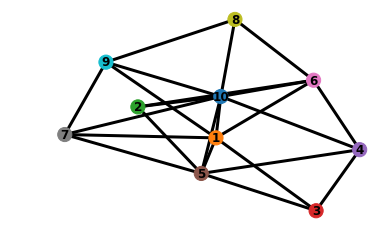

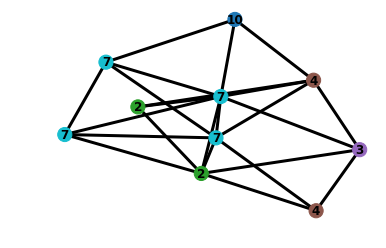

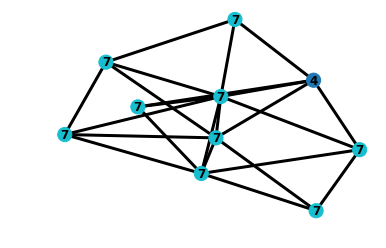

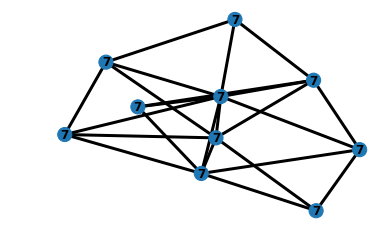

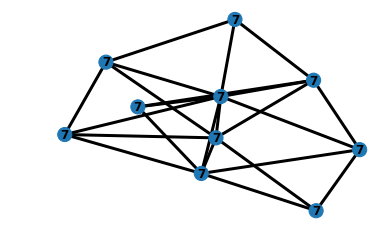

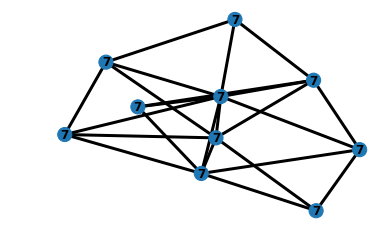

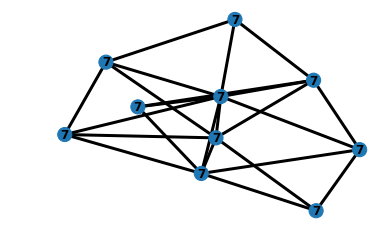

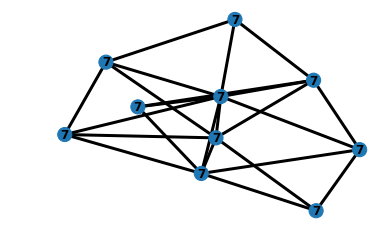

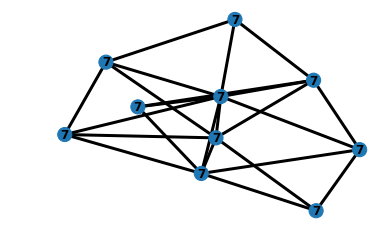

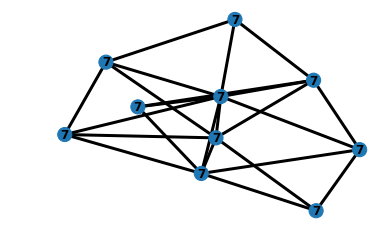

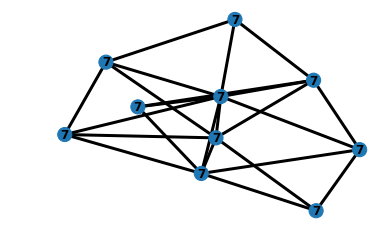

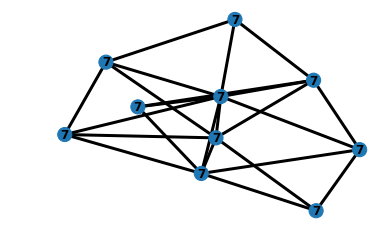

In [10]:
vm.redraw = False # We don't want an animation, and just want a new figure each time
vm.initialize('all_unique')
beliefs = list(set([v.belief[0] for v in vm._voters]))
flux_arr = []
belief_arr = []
time_arr = []

vm.draw()
plt.show()
for i in range(50):
    cb, ub, ta = vm.update()
    flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)
    if i % 5 == 0:
        vm.draw()
        plt.show()
vm.draw()
plt.show()
vm.save_gif(fps=1, fname='sim2.gif')

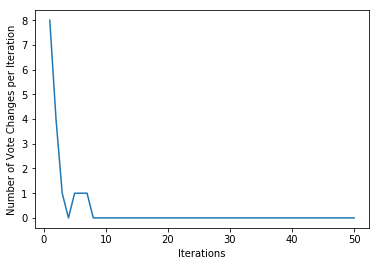

In [11]:
# Plot the average number of belief changes per iteration
if vm.clock == "discrete":
    plt.figure()
    plot_flux(flux_arr)

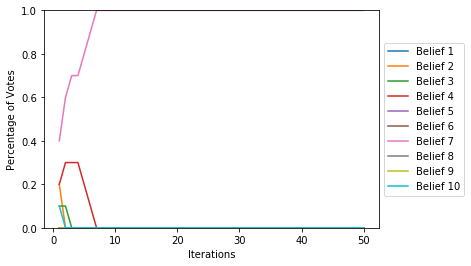

In [12]:
# Plot the distribution of beliefs per iteration
if vm.clock == 'discrete':
    plt.figure()
    plot_comparisons(belief_arr, beliefs)

In [13]:
convergence_time(time_arr, belief_arr)

70

In [14]:
# Convergence Time as a Function of n for an n-complete graph 

conv_time_arr = []

for n in range(2,21):
    er = complete_graph(n)
    vm = VoterModel(graph=er, voting='weighted_prob', visualization='spring',
                    handicap_b1=1.0, handicap_b2=0.0, clock='exponential')
    vm.redraw = False
    vm.initialize('all_unique')
    beliefs = list(set([v.belief[0] for v in vm._voters]))
    flux_arr = []
    belief_arr = []
    time_arr = []
    #vm.draw()
    #plt.show()

    ub = beliefs
    ctr = 0

    while len(set(ub)) != 1 and ctr < 1000:
        ctr += 1
        cb, ub, ta = vm.update()
        flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)

    conv_time_arr.append(convergence_time(time_arr, belief_arr))

Text(0.5, 1.0, 'N-Complete Graph')

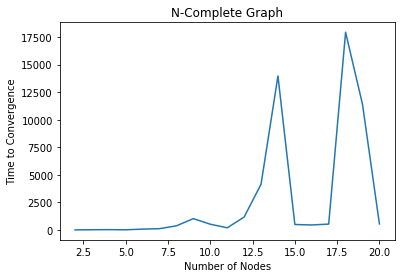

In [15]:
plt.plot(range(2,21),conv_time_arr)
plt.xlabel('Number of Nodes')
plt.ylabel('Time to Convergence')
plt.title('N-Complete Graph')

In [16]:
# Convergence Time as a Function of n for an n-ring graph 

conv_time_arr = []

for n in range(2,21):
    er = cycle(n)
    vm = VoterModel(graph=er, voting='weighted_prob', visualization='spring',
                    handicap_b1=1.0, handicap_b2=0.0, clock='exponential')
    vm.redraw = False
    vm.initialize('all_unique')
    beliefs = list(set([v.belief[0] for v in vm._voters]))
    flux_arr = []
    belief_arr = []
    time_arr = []
    #vm.draw()
    #plt.show()

    ub = beliefs
    ctr = 0

    while len(set(ub)) != 1 and ctr < 1000:
        ctr += 1
        cb, ub, ta = vm.update()
        flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)

    conv_time_arr.append(convergence_time(time_arr, belief_arr))

Text(0.5, 1.0, 'N-Ring Graph')

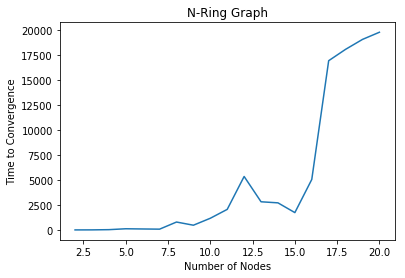

In [17]:
plt.plot(range(2,21),conv_time_arr)
plt.xlabel('Number of Nodes')
plt.ylabel('Time to Convergence')
plt.title('N-Ring Graph')

In [18]:
# Competition Between Two Beliefs in N-Complete Graph
# Fix N = 20
N = 20
er = complete_graph(N)
vm = VoterModel(graph=er, voting='weighted_prob', visualization='spring',
                handicap_b1=1.0, handicap_b2=0.0, clock='exponential')
vm.redraw = False

conv_time_arr = []

for i in range(1,20):
    vm.initialize('all_rand_two',k=i)
    beliefs = list(set([v.belief[0] for v in vm._voters]))
    flux_arr = []
    belief_arr = []
    time_arr = []
    
    ub = beliefs
    ctr = 0
    
    while len(set(ub)) != 1 and ctr < 1000:
        ctr += 1
        cb, ub, ta = vm.update()
        flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)

    conv_time_arr.append(convergence_time(time_arr, belief_arr))

Text(0.5, 1.0, 'N-Complete Graph')

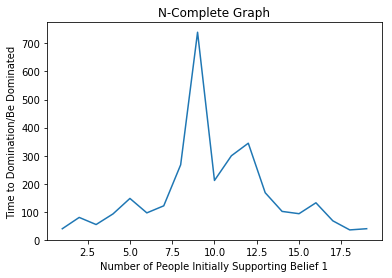

In [19]:
plt.plot(range(1,20),conv_time_arr)
plt.xlabel('Number of People Initially Supporting Belief 1')
plt.ylabel('Time to Domination/Be Dominated')
plt.title('N-Complete Graph')

In [20]:
# Competition Between Two Beliefs in N-Ring Graph
# Fix N = 20
N = 20
er = cycle(N)
vm = VoterModel(graph=er, voting='weighted_prob', visualization='spring',
                handicap_b1=2.0, handicap_b2=0.0, clock='exponential')
vm.redraw = False

conv_time_arr = []

for i in range(1,20):
    vm.initialize('all_rand_two',k=i)
    beliefs = list(set([v.belief[0] for v in vm._voters]))
    flux_arr = []
    belief_arr = []
    time_arr = []
    
    ub = beliefs
    ctr = 0
    
    while len(set(ub)) != 1 and ctr < 1000:
        ctr += 1
        cb, ub, ta = vm.update()
        flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)

    conv_time_arr.append(convergence_time(time_arr, belief_arr))

Text(0.5, 1.0, 'N-Ring Graph')

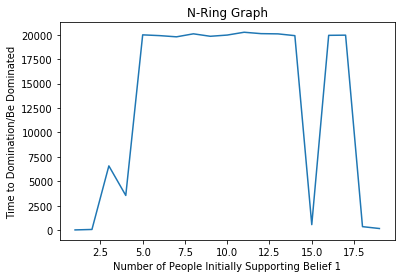

In [21]:
plt.plot(range(1,20),conv_time_arr)
plt.xlabel('Number of People Initially Supporting Belief 1')
plt.ylabel('Time to Domination/Be Dominated')
plt.title('N-Ring Graph')